In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

dataset= load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<function matplotlib.pyplot.show(close=None, block=None)>

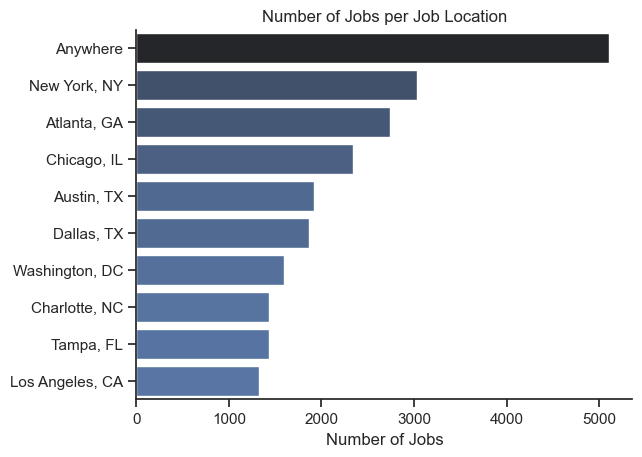

In [8]:
# Lets filter out Analyst in the US

df_DA_US = df[(df['job_country']=='United States') &(df['job_title_short']=='Data Analyst')].copy()
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette = 'dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show

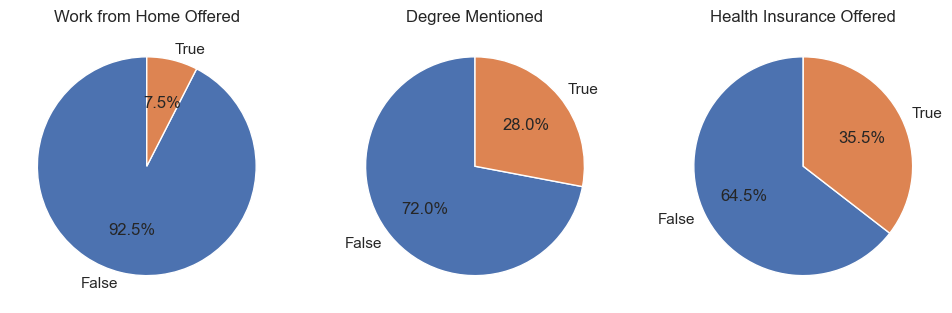

In [13]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Mentioned',
    'job_health_insurance': 'Health Insurance Offered'
}
fig, ax = plt.subplots(1,3)

fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=[False, True], startangle=90, autopct='%1.1f%%')
    ax[i].set_title(title)



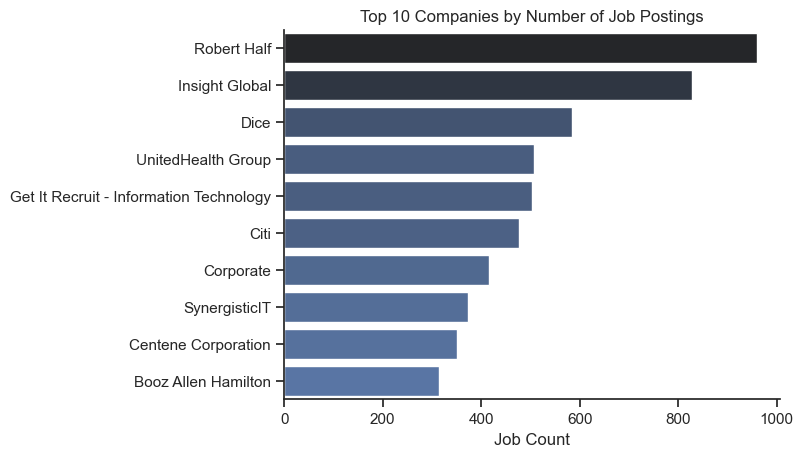

In [18]:
comp_count= df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=comp_count, x='count', y='company_name', hue ='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Companies by Number of Job Postings')
plt.ylabel('')
plt.xlabel('Job Count')
plt.show()